In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
s = r"C:\Users\khush\Downloads\retail_sales_dataset.csv"
print(s)

C:\Users\khush\Downloads\retail_sales_dataset.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(s, na_values = ["", "NA"], keep_default_na = False)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.shape

(1000, 9)

In [6]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [10]:
cat = []
con = []

for k in df.columns:
    if df[k].dtypes == "object":
        cat.append(k)
    else:
        con.append(k)

In [11]:
cat

['Date', 'Customer ID', 'Gender', 'Product Category']

In [12]:
con

['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']

In [13]:
def replacer(df):
    cat = list(df.columns[df.dtypes == "object"])

    for k in df.columns:
        if k in cat:
            mode = df[k].mode()[0]
            df[k] = df[k].fillna(mode)
        else:
            mean = df[k].mean()
            df[k] = df[k].fillna(mean)

In [14]:
replacer(df)

In [15]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [16]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


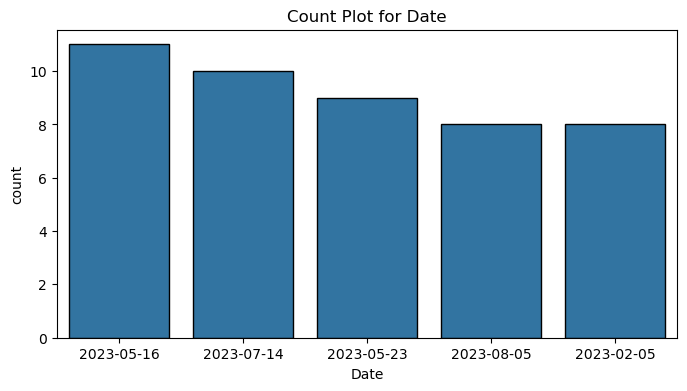

In [17]:
top_dates = df["Date"].value_counts().nlargest(5).index
filtered_df = df[df["Date"].isin(top_dates)]


plt.figure(figsize = (8, 4))
sns.countplot(data = filtered_df, x = "Date", order = top_dates, edgecolor = "black")
plt.title("Count Plot for Date")
plt.show()

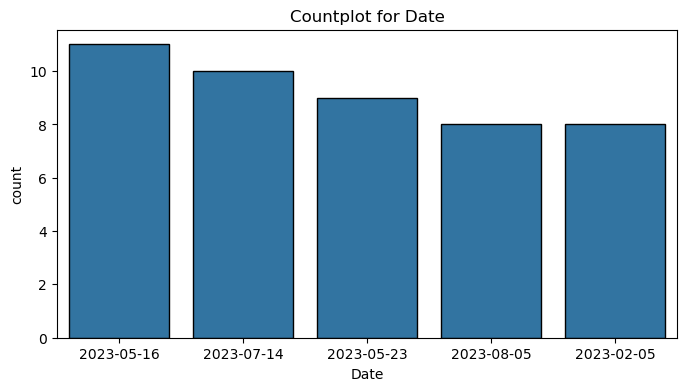

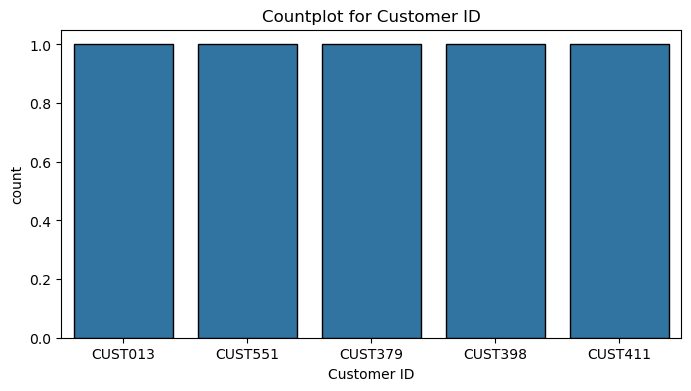

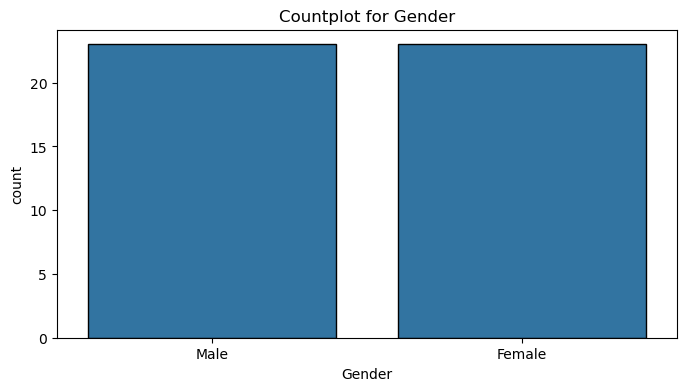

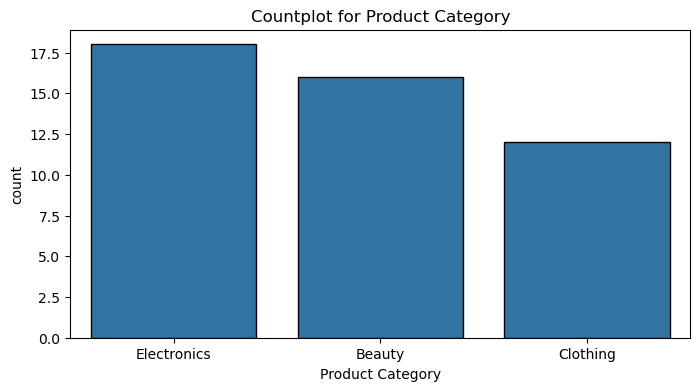

In [18]:
top_dates = df["Date"].value_counts().nlargest(5).index
filtered_df = df[df["Date"].isin(top_dates)]

columns_to_plot =  ["Date", "Customer ID", "Gender", "Product Category"]

for s in columns_to_plot:
    top_values = filtered_df[s].value_counts().nlargest(5).index
    filtered_col_df = filtered_df[filtered_df[s].isin(top_values)]

    plt.figure(figsize = (8, 4))
    sns.countplot(data = filtered_col_df, x = s, order = top_values, edgecolor = "black")
    plt.title(f"Countplot for {s}")
    plt.show()

<Axes: xlabel='Age', ylabel='Count'>

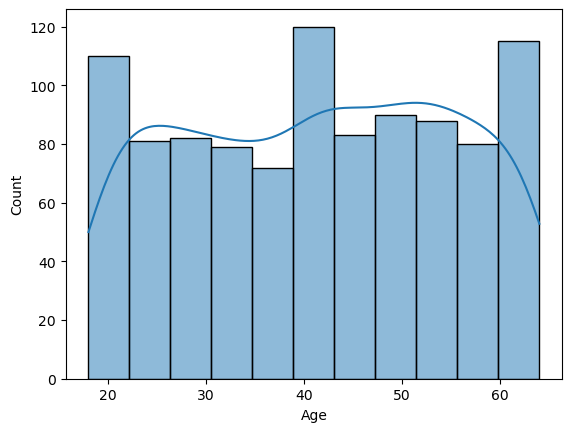

In [19]:
sns.histplot(data = df, x = "Age", kde =True, edgecolor = "black")

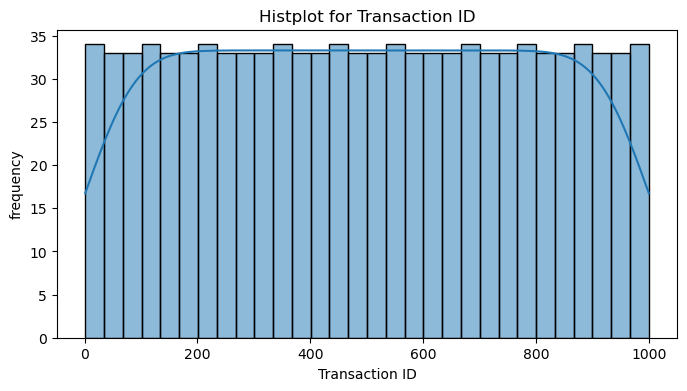

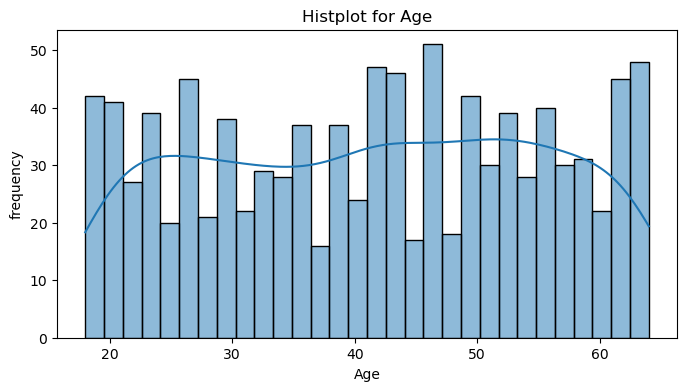

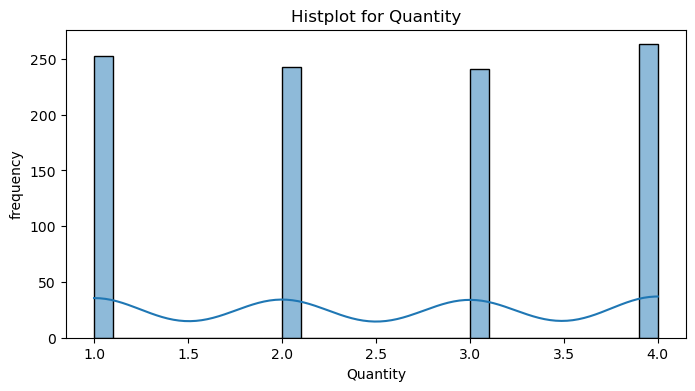

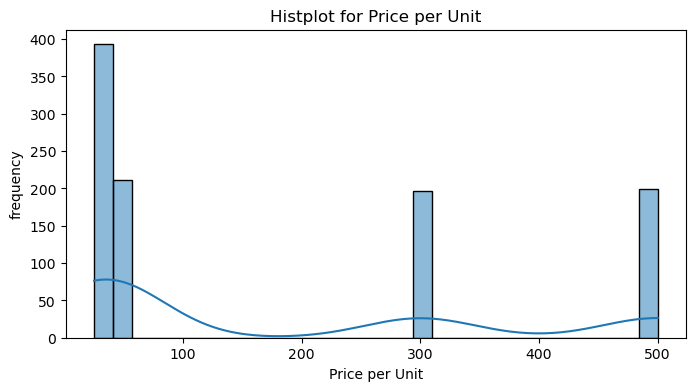

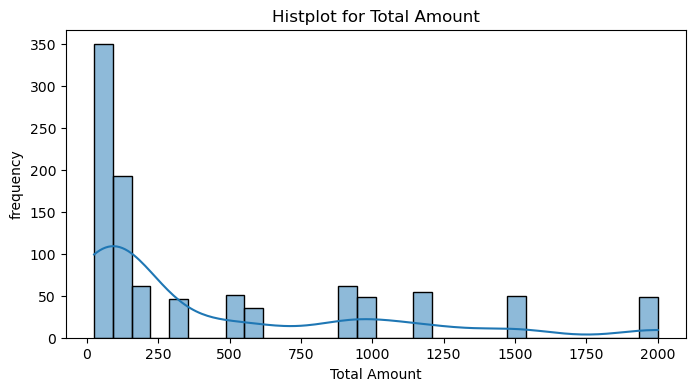

In [20]:
for k in con:
    plt.figure(figsize = (8, 4))
    sns.histplot(data = df, x = k, bins = 30, kde = True, edgecolor = "black")
    plt.title(f"Histplot for {k}")
    plt.xlabel(k)
    plt.ylabel("frequency")
    plt.show()

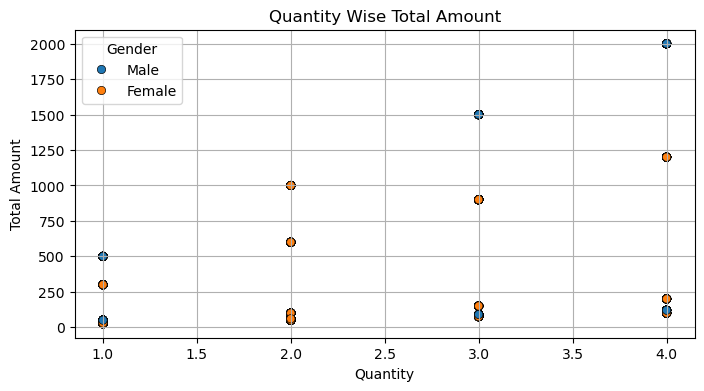

In [21]:
plt.figure(figsize = (8, 4))
sns.scatterplot(data = df, x = "Quantity", y = "Total Amount", hue = "Gender", edgecolor = "black")
plt.title("Quantity Wise Total Amount")
plt.grid()
plt.show()

In [22]:
a = df.groupby(by = "Product Category") \
    .agg({"Age":"mean"}) \
    .sort_values(by = "Age")
a

,Age
Product Category,
Beauty,40.371336
Electronics,41.736842
Clothing,41.948718


<Axes: xlabel='Product Category'>

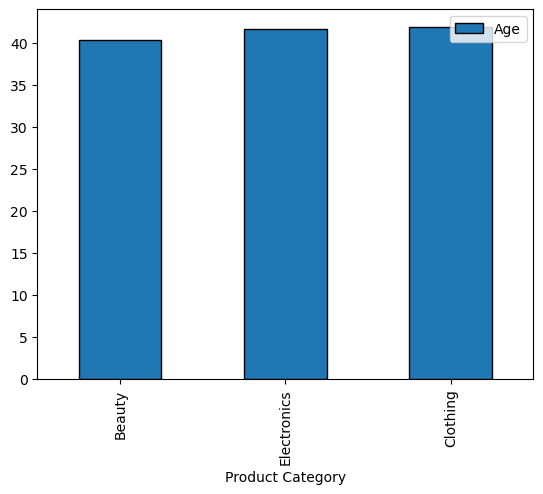

In [23]:
a.plot(kind = "bar", edgecolor = "black")

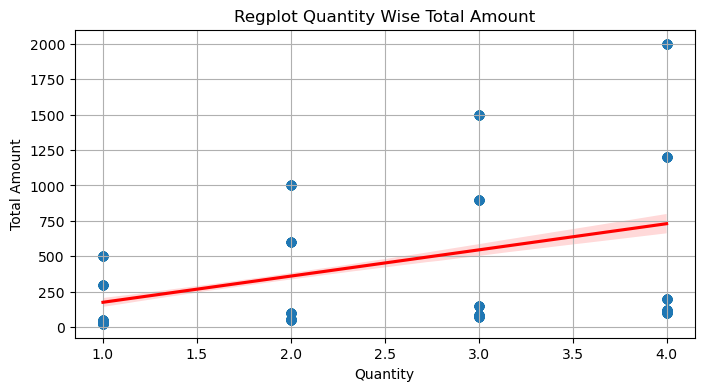

In [24]:
plt.figure(figsize = (8, 4))
sns.regplot(data = df, x = "Quantity", y = "Total Amount", line_kws = {"color":"red"})
plt.title("Regplot Quantity Wise Total Amount")
plt.grid()
plt.show()

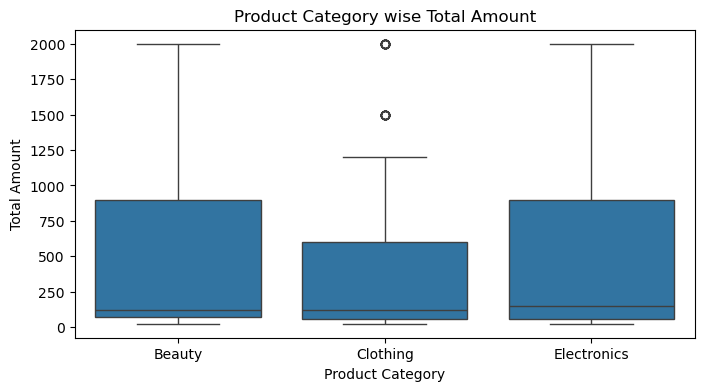

In [25]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, x = "Product Category", y = "Total Amount")
plt.title("Product Category wise Total Amount")
plt.show()

In [26]:
ctab = pd.crosstab(df["Date"], df["Product Category"])
ctab

Product Category,Beauty,Clothing,Electronics
Date,,,
2023-01-01,1,2,0
2023-01-02,1,2,1
2023-01-03,1,0,0
2023-01-04,2,1,0
2023-01-05,1,0,2
...,...,...,...
2023-12-27,1,0,1
2023-12-28,0,1,2
2023-12-29,3,0,1


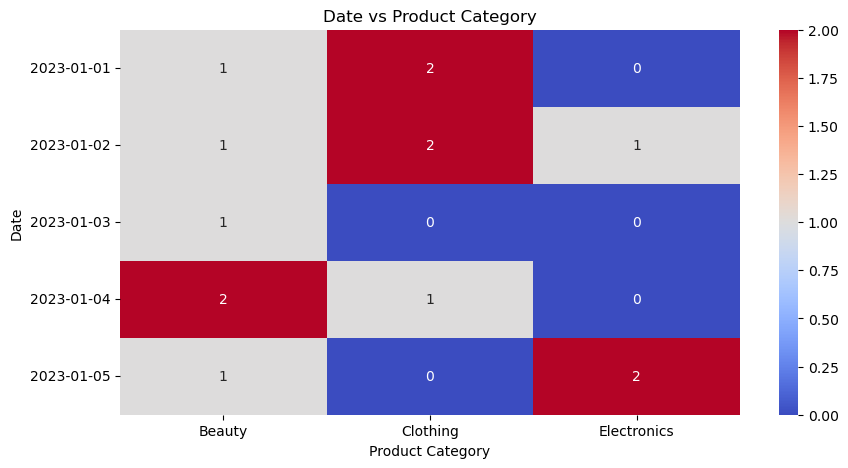

In [27]:
top5_ctab = ctab.head(5)

plt.figure(figsize = (10, 5))  
sns.heatmap(data = top5_ctab, annot = True, fmt = "d", cmap = "coolwarm")
plt.title("Date vs Product Category")
plt.show()

In [28]:
import os 
path = r"D:\DataFrame"
os.chdir(path)

In [29]:
df.to_csv("Retail Sale Dataset Clean.csv", index = False)

In [30]:
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [31]:
from ydata_profiling import ProfileReport

In [32]:
profile = ProfileReport(df, title = "Retail Sale Report")

In [33]:
import os
s2 = r"D:\DataFrame"
os.chdir(s2)

In [34]:
profile.to_file("Retail Sale Report Clean.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]